<h1> Trabalho 1 - Modulação AM

Bruno Paiva Sant'Anna - 11819507

Iure Silva Mendonça - 

Ricardo Yudi Takahashi - 

In [17]:
import numpy as np
import matplotlib.pyplot as plt

A modulação AM é uma operação realizada no sinal de modo a transmitido, usando uma onda portadora de alta frequência, para que o sinal seja enviado sem interferências.

A onda portatora é um sinal senoidal de uma única frequência, que pode ser descrita como:

$$c(t) = A_c \cos(2\pi f_c t)$$

Assim, expressão para um sinal $m(t)$ qualquer modulado é:

$$s(t) = A_c \left[ 1 + K_a m(t) \right] \cos(2\pi f_c t)$$

Para esse trabalho, será realizada a modulação de um tom, que é a modulação de um sinal com apenas uma componente senoidal. Desse modo, o sinal será do tipo:

$$m(t) = A_m \cos(2\pi f_m t)$$

Esse tipo de sinal é um caso particular da modulação AM, e a onda modulada no tempo é dada pela seguinte expressão:

$$s(t) = A_c \cos(2 \pi f_c t) + \dfrac{\mu A_c}{2} \cos[2\pi (f_c + f_m) t] + \dfrac{\mu A_c}{2} \cos[2\pi (f_c - f_m) t]$$

Onde $\mu$ é o índice de modulação dado por $\mu = A_m \cdot K_a$

In [42]:
# Definindo as variáveis

fc = 1000   # frequência da portadora (kHz)
Fs = 30000   # taxa de amostragem (kHz)
fm = 10     # frequência modulante (kHz)
Ts = 1/Fs   # taxa de amostragem (ms)
mu = 0.6    # índice de modulação
Ac = 1      # amplitude da portadora
Am = 1      # amplitude do sinal original

t = np.arange(0, 1, Ts)
N = len(t)

In [43]:
# Definindo o sinal a ser modulado

m = Am*np.cos(2*np.pi*fm*t)

# Definindo a portadora

c = Ac*np.cos(2*np.pi*fc*t)

# Aplicando a modulação AM

#s = Ac*np.cos(2*np.pi*fc*t) + (Ac*mu/2)*np.cos(2*np.pi*(fc + fm)*t) + (Ac*mu/2)*np.cos(2*np.pi*(fc - fm)*t)
s = (1+mu*m)*c

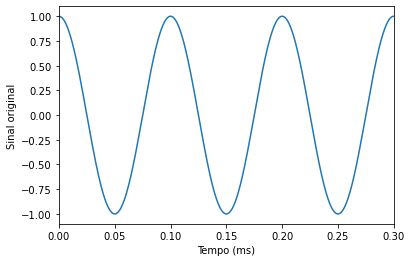

In [44]:
# Mostrando os resultados da modulação

plt.plot(t, m)
plt.xlim(0,3/fm)
plt.xlabel("Tempo (ms)")
plt.ylabel("Sinal original")
plt.show()

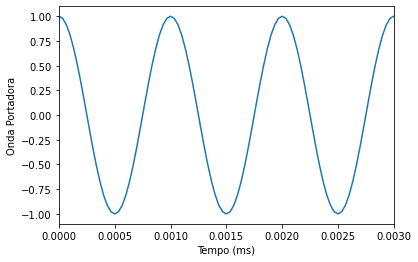

In [45]:
plt.plot(t, c)
plt.xlim(0,3/fc)
plt.xlabel("Tempo (ms)")
plt.ylabel("Onda Portadora")
plt.show()

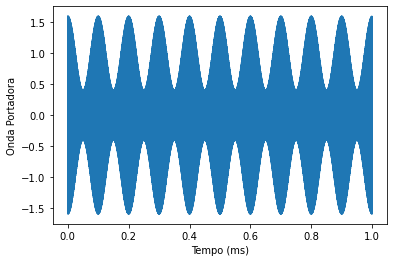

In [46]:
plt.plot(t, s)
plt.xlabel("Tempo (ms)")
plt.ylabel("Onda Portadora")
plt.show()

Com todos os sinais definidos e com a onda modulada, é possível aplicar a transformada de Fourier para observar o comportamento do sinal modulado em frequência.

In [47]:
# Aplicando a fft no sinal modulado

s_transform = np.abs(np.fft.fft(s))
freqs = np.fft.fftfreq(s_transform.size, Ts)
idx = np.argsort(freqs)
freqs=freqs[idx]
s_transform=s_transform[idx]/N

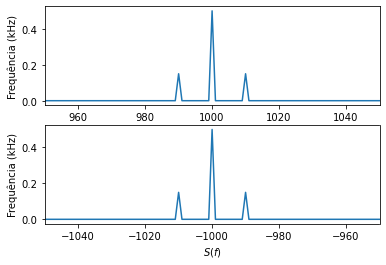

In [54]:
plt.subplot(211)
plt.plot(freqs, s_transform)
plt.xlabel("Espectro da onda modulada")
plt.ylabel("Frequência (kHz)")
plt.xlim(950, 1050)

plt.subplot(212)
plt.plot(freqs, s_transform)
plt.xlabel("Espectro da onda modulada")
plt.ylabel("Frequência (kHz)")
plt.xlim(-1050, -950)
plt.show()